In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras import metrics
np.random.seed (1671)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.datasets import mnist 

In [ ]:
data = mnist.load_data()

In [ ]:
data
type(data)

tuple

In [ ]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 
OPTIMIZER = SGD() 
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 
RESHAPED = 784


In [ ]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

In [ ]:
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [ ]:
model = Sequential()
model.add (Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add (Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add (Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f311cbd4410>>

In [ ]:
 model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 activation_18 (Activation)  (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 activation_19 (Activation)  (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
 activation_20 (Activation)  (None, 10)                0         
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-tr

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = OPTIMIZER,
             metrics = ['accuracy'])

In [ ]:
model.compile(optimizer = opt,loss= loss, metrics = ['accuracy'])

Dokladnosc modelu 95% i widac ze wykres sie wyplaszcza, wiecej epok nie daloby duzo lepszych rezultatow

In [ ]:
history = model.fit(X_train, Y_train,
                   batch_size = BATCH_SIZE,
                   epochs = 100,
                   verbose = 1,
                   validation_split = VALIDATION_SPLIT)

Epoch 1/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0874 - accuracy: 0.2929 - val_loss: 0.0840 - val_accuracy: 0.3983
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0797 - accuracy: 0.4415 - val_loss: 0.0740 - val_accuracy: 0.5128
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.5635 - val_loss: 0.0604 - val_accuracy: 0.6352
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0548 - accuracy: 0.6671 - val_loss: 0.0474 - val_accuracy: 0.7147
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0440 - accuracy: 0.7334 - val_loss: 0.0382 - val_accuracy: 0.7741
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0363 - accuracy: 0.7889 - val_loss: 0.0315 - val_accuracy: 0.8261
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0307 - accuracy: 0.8319 - val_loss: 0.0268 - val_accuracy: 0.8548

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

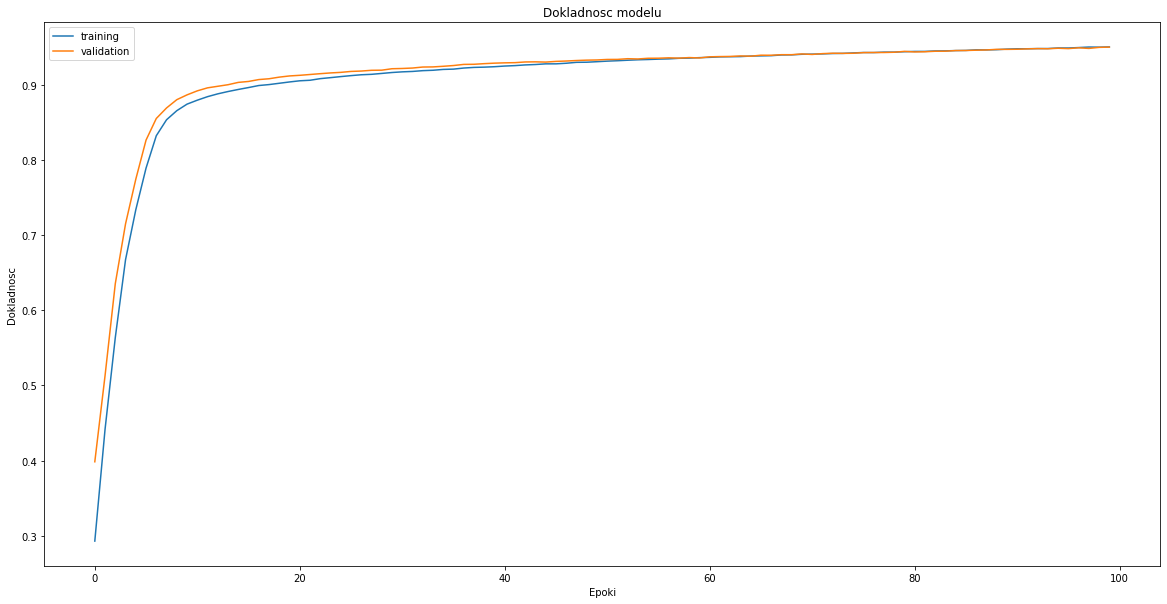

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoki")
plt.ylabel("Dokladnosc")
plt.title("Dokladnosc modelu")
plt.legend(["training", "validation"])
plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape


(60000, 28, 28)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [ ]:

model2=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())    
model2.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model2.add(MaxPooling2D(pool_size=(2,2)))
    
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(512,activation="relu"))
    
model2.add(Dense(10,activation="softmax"))
    
model2.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

In [ ]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_61 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_36 (Bat  (None, 12, 12, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_62 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_63 (Conv2D)          (None, 8, 8, 128)       

In [ ]:
epochs = 50
batch_size = 64

In [ ]:
history3 = model2.fit(X_train, Y_train, epochs = 15, batch_size = 64, validation_data = (X_test,Y_test))

Epoch 1/15
938/938 [==============================] - 420s 446ms/step - loss: 0.1448 - accuracy: 0.9645 - val_loss: 0.0641 - val_accuracy: 0.9827
Epoch 2/15
938/938 [==============================] - 419s 446ms/step - loss: 0.0442 - accuracy: 0.9882 - val_loss: 0.0393 - val_accuracy: 0.9899
Epoch 3/15
938/938 [==============================] - 416s 443ms/step - loss: 0.0292 - accuracy: 0.9925 - val_loss: 0.0293 - val_accuracy: 0.9920
Epoch 4/15
938/938 [==============================] - 422s 450ms/step - loss: 0.0207 - accuracy: 0.9949 - val_loss: 0.0272 - val_accuracy: 0.9920
Epoch 5/15
938/938 [==============================] - 426s 454ms/step - loss: 0.0151 - accuracy: 0.9967 - val_loss: 0.0246 - val_accuracy: 0.9924
Epoch 6/15
938/938 [==============================] - 421s 449ms/step - loss: 0.0119 - accuracy: 0.9977 - val_loss: 0.0244 - val_accuracy: 0.9924
Epoch 7/15
938/938 [==============================] - 422s 449ms/step - loss: 0.0085 - accuracy: 0.9990 - val_loss: 0.0241 -